In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATA\\data.csv")  # read data

In [3]:
df.head()

,ALDI_Store_ID,Revenue[mln],Month,Year
0,1001,1,1,2021
1,1002,5,1,2021
2,1003,2,1,2021
3,1010,8,1,2021
4,1001,5,2,2021


In [129]:
average_store_revenue = df.groupby("ALDI_Store_ID")["Revenue[mln]"].mean()

In [140]:
average_store_revenue.mean()

6.25

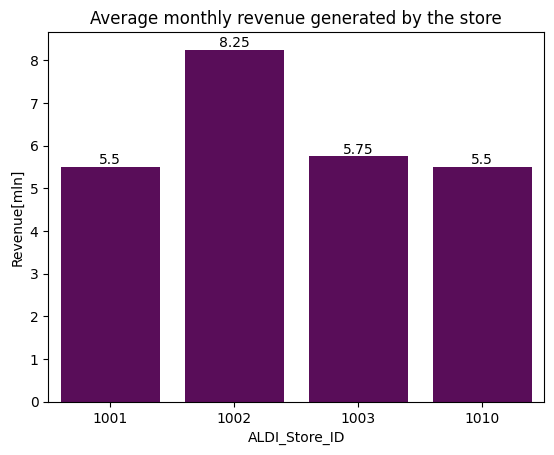

In [132]:
ax = sns.barplot(data=average_store_revenue, color="#660066")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Average monthly revenue generated by the store")
plt.savefig("DATA\\plots\\average_revenue_by_store.png");

In [113]:
total_monthly_revenue = df.groupby(["Year", "Month"])["Revenue[mln]"].sum()

In [114]:
total_monthly_revenue.index

MultiIndex([(2021, 1),
            (2021, 2),
            (2022, 1),
            (2022, 2)],
           names=['Year', 'Month'])

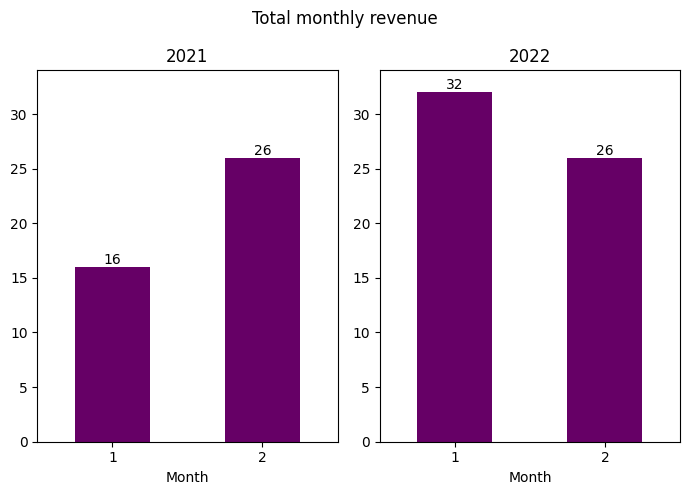

In [139]:
axes = total_monthly_revenue.unstack(level=0).plot(
    kind="bar", subplots=True, rot=0, figsize=(7, 5), layout=(1, 2), color="#660066"
)

max_y = total_monthly_revenue.max()

for ax in axes.flatten():
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    for container in ax.containers:
        ax.bar_label(container)
        ax.set_ylim(0, max_y + 2)

plt.suptitle("Total monthly revenue")
plt.tight_layout()
plt.savefig("DATA\\plots\\total_monthly_revenue.png");

In [116]:
average_monthly_revenue = df.groupby(["Year", "Month"])["Revenue[mln]"].sum().mean()

In [118]:
average_monthly_revenue

25.0

In [106]:
annual_revenue = df.groupby("Year")["Revenue[mln]"].sum()
max_annual_revenue = annual_revenue.max()

In [107]:
annual_revenue

Year
2021    42
2022    58
Name: Revenue[mln], dtype: int64

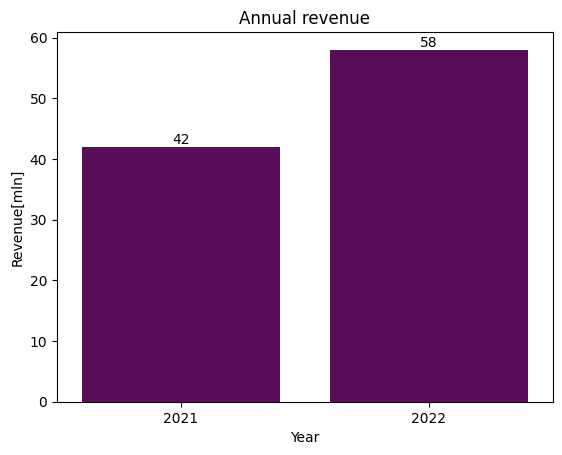

In [109]:
ax = sns.barplot(data=annual_revenue, color="#660066")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Annual revenue")
plt.savefig("DATA\\plots\\annual_revenue.png");

In [110]:
max_annual_revenue

58